Cele: praca z rzeczywistym zbiorem danych, czyszczenie, zamiana typów, wykresy trendów.

Dane:
Użyj uproszczonego zbioru pogodowego – np. "GlobalLandTemperaturesByMajorCity.csv"
(plik dostępny w serwisie Kaggle).

Polecenia:
Wczytaj dane o temperaturze dla jednego miasta (np. Warsaw).

Ogranicz dane do okresu 1970–2020, usuń wartości NaN, popraw format dat (pd.to_datetime).

Oblicz średnią roczną temperaturę i narysuj wykres liniowy zmian temperatur w czasie.

Oblicz różnicę między temperaturą średnią z lat 1970–1990 a 2000–2020.

Wyświetl wykres z linią trendu (użyj sns.regplot lub sns.lineplot).

Dodatkowe pytania do refleksji (Markdown):

Czy można zauważyć trend zmian klimatycznych?

Jakie dodatkowe dane można by dołączyć (np. opady, emisje CO₂)?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset = pd.read_csv("GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv")

In [10]:
dataset.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [14]:
pd.to_datetime(dataset['dt'])

0        1849-01-01
1        1849-02-01
2        1849-03-01
3        1849-04-01
4        1849-05-01
            ...    
239172   2013-05-01
239173   2013-06-01
239174   2013-07-01
239175   2013-08-01
239176   2013-09-01
Name: dt, Length: 239177, dtype: datetime64[ns]

In [17]:
paris_temp = dataset.loc[(dataset["City"] == "Paris")]
paris_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
173008,1743-11-01,7.648,1.749,Paris,France,49.03N,2.45E
173009,1743-12-01,NaN,NaN,Paris,France,49.03N,2.45E
173010,1744-01-01,NaN,NaN,Paris,France,49.03N,2.45E
173011,1744-02-01,NaN,NaN,Paris,France,49.03N,2.45E
173012,1744-03-01,NaN,NaN,Paris,France,49.03N,2.45E
...,...,...,...,...,...,...,...
176242,2013-05-01,11.703,0.282,Paris,France,49.03N,2.45E
176243,2013-06-01,16.340,0.271,Paris,France,49.03N,2.45E
176244,2013-07-01,21.186,0.381,Paris,France,49.03N,2.45E
176245,2013-08-01,19.235,0.399,Paris,France,49.03N,2.45E


In [22]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [24]:
is_datetime(paris_temp['dt'])

False

In [25]:
paris_temp['dt'].isnull().values.any()

False

In [26]:
paris_temp['dt'] = pd.to_datetime(paris_temp['dt'])

C:\Users\Dawid\AppData\Local\Temp\ipykernel_12596\2982094391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_temp['dt'] = pd.to_datetime(paris_temp['dt'])


In [27]:
is_datetime(paris_temp['dt'])

True

In [29]:
paris_temp.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
173008,1743-11-01,7.648,1.749,Paris,France,49.03N,2.45E
173013,1744-04-01,10.195,2.282,Paris,France,49.03N,2.45E
173014,1744-05-01,12.607,1.553,Paris,France,49.03N,2.45E
173015,1744-06-01,16.121,1.529,Paris,France,49.03N,2.45E
173016,1744-07-01,17.669,1.687,Paris,France,49.03N,2.45E
...,...,...,...,...,...,...,...
176241,2013-04-01,9.559,0.251,Paris,France,49.03N,2.45E
176242,2013-05-01,11.703,0.282,Paris,France,49.03N,2.45E
176243,2013-06-01,16.340,0.271,Paris,France,49.03N,2.45E
176244,2013-07-01,21.186,0.381,Paris,France,49.03N,2.45E


In [30]:
paris_temp.isnull().values.any()

True

In [31]:
paris_temp.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
173008,1743-11-01,7.648,1.749,Paris,France,49.03N,2.45E
173013,1744-04-01,10.195,2.282,Paris,France,49.03N,2.45E
173014,1744-05-01,12.607,1.553,Paris,France,49.03N,2.45E
173015,1744-06-01,16.121,1.529,Paris,France,49.03N,2.45E
173016,1744-07-01,17.669,1.687,Paris,France,49.03N,2.45E
...,...,...,...,...,...,...,...
176241,2013-04-01,9.559,0.251,Paris,France,49.03N,2.45E
176242,2013-05-01,11.703,0.282,Paris,France,49.03N,2.45E
176243,2013-06-01,16.340,0.271,Paris,France,49.03N,2.45E
176244,2013-07-01,21.186,0.381,Paris,France,49.03N,2.45E


In [32]:
paris_temp.isnull().values.any()

True

In [35]:
clean_paris = paris_temp.dropna()
clean_paris

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
173008,1743-11-01,7.648,1.749,Paris,France,49.03N,2.45E
173013,1744-04-01,10.195,2.282,Paris,France,49.03N,2.45E
173014,1744-05-01,12.607,1.553,Paris,France,49.03N,2.45E
173015,1744-06-01,16.121,1.529,Paris,France,49.03N,2.45E
173016,1744-07-01,17.669,1.687,Paris,France,49.03N,2.45E
...,...,...,...,...,...,...,...
176241,2013-04-01,9.559,0.251,Paris,France,49.03N,2.45E
176242,2013-05-01,11.703,0.282,Paris,France,49.03N,2.45E
176243,2013-06-01,16.340,0.271,Paris,France,49.03N,2.45E
176244,2013-07-01,21.186,0.381,Paris,France,49.03N,2.45E


In [36]:
clean_paris.isnull().values.any()

False

In [40]:
mod_paris = clean_paris.loc[(clean_paris['dt'] >= pd.to_datetime('1970-01-01')) & (clean_paris['dt'] <= pd.to_datetime('2020-12-31'))]
mod_paris

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
175722,1970-01-01,3.747,0.233,Paris,France,49.03N,2.45E
175723,1970-02-01,3.941,0.271,Paris,France,49.03N,2.45E
175724,1970-03-01,4.195,0.194,Paris,France,49.03N,2.45E
175725,1970-04-01,7.562,0.367,Paris,France,49.03N,2.45E
175726,1970-05-01,13.866,0.308,Paris,France,49.03N,2.45E
...,...,...,...,...,...,...,...
176241,2013-04-01,9.559,0.251,Paris,France,49.03N,2.45E
176242,2013-05-01,11.703,0.282,Paris,France,49.03N,2.45E
176243,2013-06-01,16.340,0.271,Paris,France,49.03N,2.45E
176244,2013-07-01,21.186,0.381,Paris,France,49.03N,2.45E


In [41]:
is_datetime(mod_paris['dt'])

True

In [42]:
mean_temp = mod_paris.groupby('dt')['AverageTemperature'].mean().reset_index()
mean_temp

,dt,AverageTemperature
0,1970-01-01,3.747
1,1970-02-01,3.941
2,1970-03-01,4.195
3,1970-04-01,7.562
4,1970-05-01,13.866
...,...,...
519,2013-04-01,9.559
520,2013-05-01,11.703
521,2013-06-01,16.340
522,2013-07-01,21.186


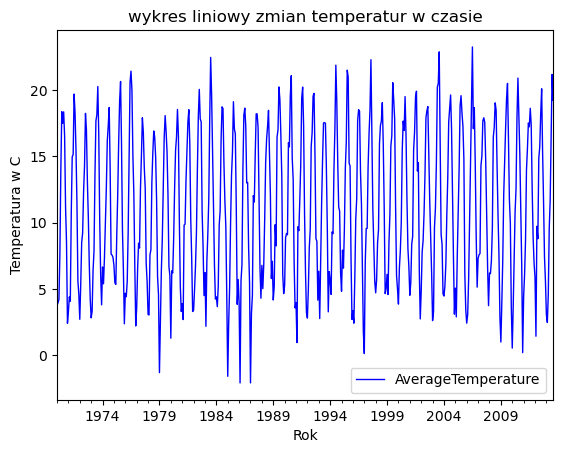

In [80]:
mean_temp.plot(x='dt', y='AverageTemperature', kind='line', color='blue', ls='-', linewidth = 1)
plt.xlabel('Rok')
plt.ylabel('Temperatura w C')
plt.title('wykres liniowy zmian temperatur w czasie')
plt.legend()
plt.show()

Oblicz różnicę między temperaturą średnią z lat 1970–1990 a 2000–2020.

In [84]:
st_half = mean_temp.loc[(mean_temp['dt'] >= pd.to_datetime('1970-01-01')) & (mean_temp['dt'] <= pd.to_datetime('1990-12-31'))]
st_half

,dt,AverageTemperature
0,1970-01-01,3.747
1,1970-02-01,3.941
2,1970-03-01,4.195
3,1970-04-01,7.562
4,1970-05-01,13.866
...,...,...
247,1990-08-01,21.089
248,1990-09-01,14.868
249,1990-10-01,13.276
250,1990-11-01,7.023


In [85]:
nd_half = mean_temp.loc[(mean_temp['dt'] >= pd.to_datetime('2000-01-01')) & (mean_temp['dt'] <= pd.to_datetime('2020-12-31'))]
nd_half

,dt,AverageTemperature
360,2000-01-01,3.845
361,2000-02-01,6.587
362,2000-03-01,7.872
363,2000-04-01,10.067
364,2000-05-01,15.451
...,...,...
519,2013-04-01,9.559
520,2013-05-01,11.703
521,2013-06-01,16.340
522,2013-07-01,21.186


Oblicz różnicę między temperaturą średnią z lat 1970–1990 a 2000–2020.

In [97]:
st_mean = st_half['AverageTemperature'].mean()
st_mean

10.697269841269843

In [98]:
nd_mean = nd_half['AverageTemperature'].mean()
nd_mean

11.514274390243903

In [101]:
mean_diff = nd_mean - st_mean
mean_diff

0.8170045489740598

In [102]:
import seaborn as sns

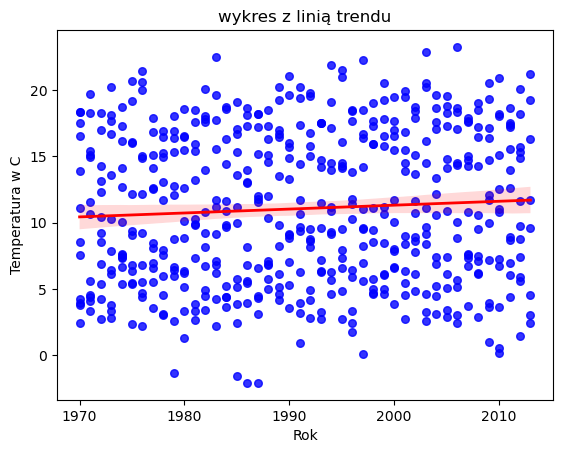

In [117]:
mean_temp['rok'] = pd.to_datetime(mean_temp['dt']).dt.year
sns.regplot(data=mean_temp, x='rok', y='AverageTemperature', scatter=True, line_kws={'color': 'red', 'linewidth': 2},
            scatter_kws={'color': 'blue', 's': 30})
plt.title('wykres z linią trendu')
plt.xlabel('Rok')
plt.ylabel('Temperatura w C')
plt.show()

Czy można zauważyć trend zmian klimatycznych?

Jakie dodatkowe dane można by dołączyć (np. opady, emisje CO₂)?

Na wykresie widać znikomy trend rosnący od roku 1970 do roku 2020